In [18]:
import numpy as np
import pandas as pd
from konlpy.tag import *
import matplotlib.pylab as plt
%matplotlib inline
from korean_crawling_bundles import *

In [19]:
train_df = pd.read_csv('0919_with_link.csv')
train_df.tail()

,Link,Doc
75,http://v.media.daum.net/v/20180919044147871,스페인 바르셀로나 가스텍2018 전시회장 전경./사진=박준식 기자\n\n18일 아침...
76,http://v.media.daum.net/v/20180919043005801,[이데일리 정병묵 기자] 휴전선 인근 땅값이 다시 들썩이고 있다. 지난 4월 판문점...
77,http://v.media.daum.net/v/20180919040404568,남북정상회담일인 18일 오후 서울 중구 동대문디자인플라자(DDP)에 차려진 남북정상...
78,http://v.media.daum.net/v/20180919040028519,"롯데마트가 중국 화북, 화동지역 점포 매각을 마무리하고 매각이 불발된 중경, 성도 ..."
79,http://v.media.daum.net/v/20180919040006511,9·13 대책이 발표되고 닷새가 지났지만 정책별로 시행일이 다른 데다 세부 지침도 ...


In [20]:
kkma = Kkma()

train = train_df.iloc[:,1:].values
train_report = [train[i][0] for i in range(len(train))]
print(len(train_report))
train_report[0]

80


'쿡 애플 CEO "미중 무역전쟁 잘 해결될 것..제로섬 게임 아냐"\n연합뉴스 | 2018.09.19 07:08\n(로스앤젤레스=연합뉴스) 옥철 특파원 = 도널드 트럼프 미국 행정부의 중국산 제품 관세 부과 리스트에서 애플워치와 에어팟을 제외시키는 데 성공한 팀 쿡 애플 최고경영자(CEO)가 관세와 아이폰 가격 등 최근 현안에 관해 입을 열었다.\n쿡은 18일(현지시간) 미 ABC 방송 \'굿모닝아메리카(GMA)\'에 나와 애플 제품이 관세 면제 대상이 된 점에 대해 "미국과 중국은 궁극적으로 무역의 차이를 잘 해결해나갈 걸로 본다"고 말했다.\n그는 "무역은 제로섬 게임이 아니기 때문에 나로서는 낙관하고 있다"면서 이같이 말했다.\n신형 아이폰 발표한 팀 쿡 애플 CEO\n제로섬 게임은 한쪽이 이득을 얻으면 다른 한쪽은 반드시 손해를 보게 돼 있는 경기의 룰을 말한다.\n쿡은 "우리는 어떤 것을 교역함으로써 둘 다 이길 수 있다. 두 나라가 이걸 정리할 수 있다고 낙관한다"고 말했다.\n애플은 트럼프 대통령이 관세 부과를 실행에 옮기기 전 미국무역대표부(USTR)에 서한을 보내 애플워치 등 자사 제품에 관세가 붙으면 소비자 가격이 상승할 것이라는 우려를 표시한 바 있다.\n쿡은 왜 애플 제품이 관세 대상에서 빠졌는지 묻자 "아이폰은 중국에서 조립되지만 부품은 전 세계 도처에서 오는 것"이라고 답했다.\n그는 이어 지난주 공개한 아이폰 XS, XS맥스, XR 등 신형 모델 3종의 가격이 지나치게 높게 책정됐다는 지적에 대해서도 반박했다.\n쿡은 "그 폰(신형 아이폰)은 여러분의 디지털 카메라를 대체한다. 캠코더도 대체한다. 그밖에 모든 기기를 대체할 수 있다. 그런 혁신을 다 담으려면 그렇게 비쌀 수밖에 없다"라고 말했다.\n아이폰 XS맥스 가격은 512기가바이트(GB) 용량을 채택할 경우 세금을 빼고도 1천449달러(약 163만 원)에 달한다. 한국에서는 환율 변동성을 고려해 200만 원이 넘을 것이라는 얘기도 나온다.\n쿡 CEO는 그러나 "여러분이 1천

In [ ]:
try:
    training_ls = [str(kkma.nouns(train_report[i])) for i in range(len(train_report))]
except : 
    excepted_ls.append(i)
    print('{}th data is excepted, maybe it has NaN value'.format(i))
    
display(Markdown('#### length of data : {}'.format(len(training_ls))))

In [ ]:
word_df = pd.DataFrame(data = training_ls,columns=np.arange(1))
# df.to_csv('0916_konlpy.csv')
word_df.tail()

In [ ]:
word_df.to_csv('konlpy_0919_link.csv',index=False)

In [7]:
for i in range(len(word_df)) : 
    word_df.iat[i,0] = word_df.iat[i,0][1:-1]
    
word_ls = []
for i in range(len(word_df)) : 
    new_ls = word_df.iat[i,0].split(',')

    for i in range(len(new_ls)) : 
        new_ls[i] = new_ls[i].replace(' ','')
    
    for i in range(len(new_ls)) : 
        new_ls[i] = new_ls[i].replace("'",'')
    
    word_ls += new_ls
len(word_ls)

17782

In [8]:
print(len(word_ls))
for _ in range(10):
    for idx,i in enumerate(word_ls) : 
        if len(i) < 3:
             word_ls.pop(idx)
    print(len(word_ls))

17782
10546
7135
5952
5704
5691
5691
5691
5691
5691
5691


In [9]:
from collections import Counter
cnt_dict = dict(Counter(word_ls))

df = pd.DataFrame(columns=['Count'])
df['Count'] = cnt_dict.values()
df.index = cnt_dict.keys()
df.sort_values('Count',ascending=False,inplace=True)

df

,Count
18일,62
2018.09,38
트럼프,29
대통령,28
연합뉴스,27
2000,27
중국산,26
현지시간,24
가능성,24
저작권자,22


,Count
count,2440.000000
mean,2.332377
std,2.918705
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,62.000000


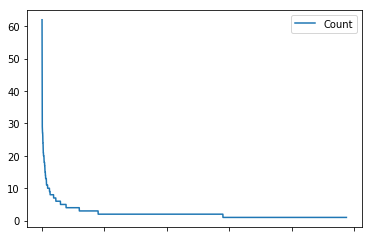

In [10]:
display(df.describe())
display(df.plot())

In [11]:
testing_ls = list(df[df['Count']>1].index)
len(testing_ls)

1450

In [12]:
count_dictionary = dict(zip(np.arange(len(train_df)),[0 for _ in range(len(train_df))]))
for idx,doc in enumerate(train_df['Doc']):
    for word in testing_ls : 
        if word in doc : 
            count_dictionary[idx] += 1
count_dictionary

{0: 47,
 1: 62,
 2: 75,
 3: 60,
 4: 83,
 5: 63,
 6: 88,
 7: 91,
 8: 35,
 9: 101,
 10: 33,
 11: 80,
 12: 102,
 13: 26,
 14: 53,
 15: 66,
 16: 107,
 17: 26,
 18: 200,
 19: 118,
 20: 71,
 21: 75,
 22: 78,
 23: 67,
 24: 47,
 25: 33,
 26: 36,
 27: 27,
 28: 10,
 29: 36,
 30: 24,
 31: 77,
 32: 20,
 33: 20,
 34: 99,
 35: 44,
 36: 88,
 37: 106,
 38: 124,
 39: 57,
 40: 75,
 41: 40,
 42: 71,
 43: 73,
 44: 89,
 45: 55,
 46: 29,
 47: 31,
 48: 3,
 49: 21,
 50: 93,
 51: 71,
 52: 83,
 53: 53,
 54: 37,
 55: 40,
 56: 26,
 57: 25,
 58: 22,
 59: 4,
 60: 43,
 61: 55,
 62: 69,
 63: 57,
 64: 81,
 65: 60,
 66: 86,
 67: 88,
 68: 101,
 69: 78,
 70: 100,
 71: 23,
 72: 50,
 73: 64,
 74: 104,
 75: 194,
 76: 116,
 77: 66,
 78: 68,
 79: 71}

In [13]:
final_df = pd.DataFrame(columns=['Count'])
final_df['Count'] = count_dictionary.values()
final_df.index = count_dictionary.keys()
final_df.sort_values('Count',ascending=False,inplace=True)

final_df

,Count
18,200
75,194
38,124
19,118
76,116
16,107
37,106
74,104
12,102
9,101


In [14]:
most_freq = final_df.iloc[:5]
least_freq = final_df.iloc[-5:]

In [15]:
display(most_freq)
display(least_freq)

,Count
18,200
75,194
38,124
19,118
76,116


,Count
32,20
33,20
28,10
59,4
48,3


In [16]:
most_freq_link = []
least_freq_link = []

for idx in list(most_freq.index) : 
    most_freq_link.append(train_df['Link'][idx])
for idx in list(most_freq.index) :     
    least_freq_link.append(train_df['Link'][idx])
print(len(most_freq_link) , len(least_freq_link))

5 5


In [17]:
display(most_freq_link)
display(least_freq_link)

['http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180919044147871&limit=30&page=1',
 'http://v.media.daum.net/v/20180919044147871',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004107598&office_id=008&mode=mainnews&type=&date=2018-09-19&page=1',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180919043005801&limit=30&page=1',
 'http://v.media.daum.net/v/20180919043005801']

['http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180919044147871&limit=30&page=1',
 'http://v.media.daum.net/v/20180919044147871',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004107598&office_id=008&mode=mainnews&type=&date=2018-09-19&page=1',
 'http://finance.daum.net/news/news_content.daum?type=main&sub_type=&docid=MD20180919043005801&limit=30&page=1',
 'http://v.media.daum.net/v/20180919043005801']